In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('played_out_cleaned.csv', index_col=0)


In [4]:
df.keys()

Index(['position', 'played_at', 'duration_ms', 'explicit', 'track_id',
       'track_name', 'popularity', 'first_genre', 'user', 'gender', 'age',
       'acousticness', 'danceability', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence',
       'artist'],
      dtype='object')

# Analysis

# testing on a single user data

In [7]:
sample = df[df['user'] == 'b3a05964788f4433a57a6113f54418e2_AnirudhParameswaran'].sort_values(by='position', ascending=True).reset_index(drop=True)
sample.head() # (51, 23)

,position,played_at,duration_ms,explicit,track_id,track_name,popularity,first_genre,user,gender,...,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,artist
0,0,2025-10-1T01:00:00:000Z,223760,False,1lK5iIMKifrxERzS3iimJH,Breathe on Me,56,1,b3a05964788f4433a57a6113f54418e2_AnirudhParame...,M,...,0.565,0.01250,5.0,0.0901,-6.395,0.0,0.0471,112.203,0.571,Britney Spears
1,1,2025-10-1T02:00:00:000Z,167303,False,4Dvkj6JhhA12EX05fT7y2e,As It Was,88,1,b3a05964788f4433a57a6113f54418e2_AnirudhParame...,M,...,0.731,0.00101,6.0,0.3110,-5.338,0.0,0.0557,173.930,0.662,Harry Styles
2,2,2025-12-20T17:14:51.694Z,210373,False,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,95,1,b3a05964788f4433a57a6113f54418e2_AnirudhParame...,M,...,0.507,0.06080,2.0,0.1170,-10.171,1.0,0.0358,104.978,0.438,Billie Eilish
3,3,2025-12-20T17:14:57.534Z,173991,False,6UelLqGlWMcVH1E5c4H7lY,Watermelon Sugar,84,1,b3a05964788f4433a57a6113f54418e2_AnirudhParame...,M,...,0.816,0.00000,0.0,0.3350,-4.209,1.0,0.0465,95.390,0.557,Harry Styles
4,4,2025-12-20T17:15:00.448Z,200600,False,7DSAEUvxU8FajXtRloy8M0,Flowers,86,1,b3a05964788f4433a57a6113f54418e2_AnirudhParame...,M,...,0.691,0.00007,0.0,0.0232,-4.775,1.0,0.0633,118.048,0.632,Miley Cyrus


In [8]:
sample['position']
sample['track_name'].unique().size   # 51 songs and not 50 ????

51

In [9]:
positional_df = df.groupby('position')['popularity'].agg(['mean', 'std']).reset_index()
positional_df.columns = ['position', 'popularity_mean', 'popularity_std']

positional_df.head()

,position,popularity_mean,popularity_std
0,0,60.449438,9.091719
1,1,67.168539,30.825106
2,2,78.573034,11.247108
3,3,75.640449,16.531820
4,4,74.494382,20.276567


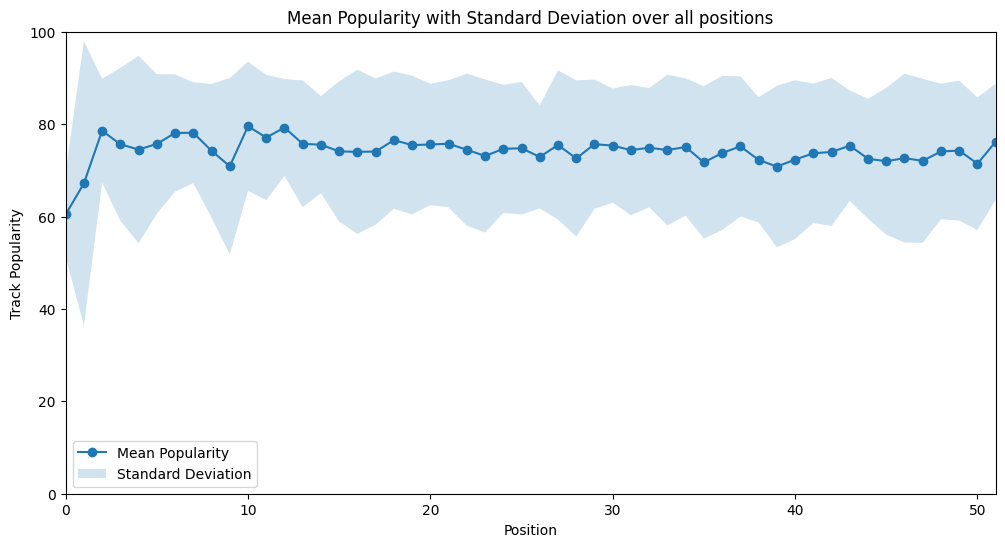

In [10]:
plt.figure(figsize=(12, 6))

# Plot the mean line and points
plt.plot(positional_df['position'], positional_df['popularity_mean'], marker='o', label='Mean Popularity')

# Plot the error bands (mean +/- std)
plt.fill_between(
    positional_df['position'], 
    positional_df['popularity_mean'] - positional_df['popularity_std'], 
    positional_df['popularity_mean'] + positional_df['popularity_std'], 
    alpha=0.2, 
    label='Standard Deviation'
)
# x axis limits
plt.xlim(0, 51)
plt.ylim(0, 100)
plt.xlabel('Position')
plt.ylabel('Track Popularity')
plt.title('Mean Popularity with Standard Deviation over all positions')
plt.legend()
plt.show()

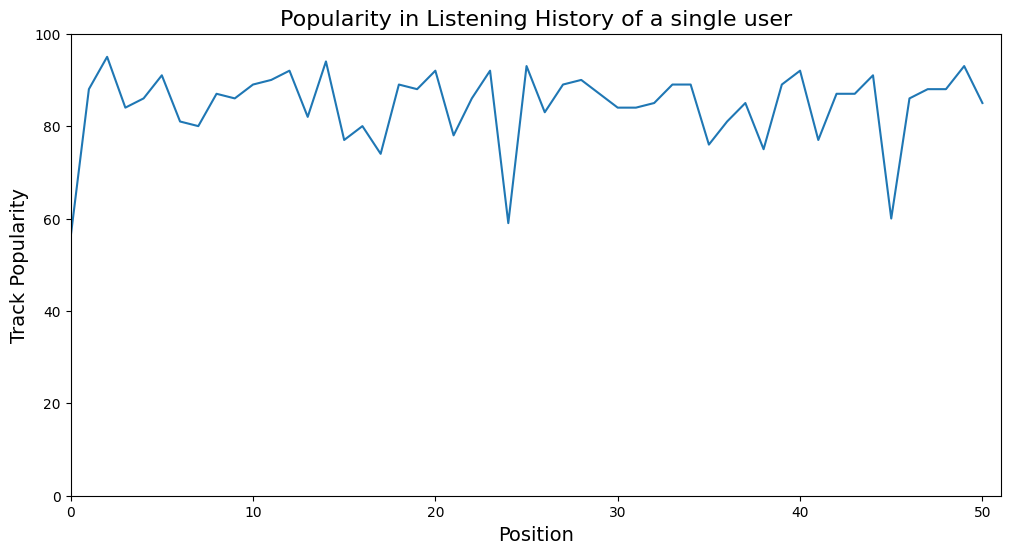

In [12]:
figure, ax = plt.subplots(figsize=(12,6))
sns.lineplot(x='position', y='popularity', data=sample, ax = ax)
# x axis limits
plt.xlim(0, 51)
plt.ylim(0, 100)
ax.set_title('Popularity in Listening History of a single user', fontsize=16)
ax.set_ylabel('Track Popularity', fontsize=14)
ax.set_xlabel('Position', fontsize=14)
plt.show()

### Shows, popularity is time independent

In [13]:
df[df['acousticness'].isna() | df['danceability'].isna() | df['energy'].isna() | df['instrumentalness'].isna() | df['liveness'].isna() | df['loudness'].isna() | df['speechiness'].isna() | df['tempo'].isna() | df['valence'].isna()].shape

(273, 23)

### There are 273 songs, which do not have songs features.
1) Should we just remove.
2) Include them by some research or from other resources. (complicated)
3) Is it belong to a specific user or participant?

In [15]:
df.isna().sum() # (4572, 24) : 4572 - 273 = 4299 non na rows
# 273/4572 = 0.06 # 6% of the data is missing some audio features

# Number of the row with NA values
df.isna().any(axis=1).sum() #273

np.int64(273)

(4299, 23)

# 1) 'First Genre' : a grouping variable
### See how each audio feature changes over the positions

In [ ]:
dataset_1 = df.copy()
dataset_1 = dataset_1.dropna().reset_index(drop=True)
dataset_1.shape # (4299, 24)

(4299, 16)

In [27]:
dataset_1.keys()
# drop the columns
dataset_1 = dataset_1.drop(columns=['played_at', 'duration_ms'])
dataset_1.shape # (4299, 22)
dataset_1.head()

,position,explicit,track_id,track_name,popularity,first_genre,user,gender,age,acousticness,...,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,artist
0,0,False,7p6oXzBSPAXXz8Xb8gBPki,Subzero - Original Mix,45,3,19befa2d20a544b3819a1236cf7536c4_Harsh1,F,20,0.58800,...,0.608,0.8610,6.0,0.0991,-11.638,0.0,0.0673,124.988,0.118,Ben Klock
1,0,False,3ENHpbTuY72FukZbwGP6bc,Tear Away,67,4,24bebb12512f476a8e08b14a1aaa08ea_Hannah,F,40,0.00055,...,0.648,0.0028,0.0,0.0846,-4.579,1.0,0.0441,132.983,0.457,Drowning Pool
2,0,False,7p6oXzBSPAXXz8Xb8gBPki,Subzero - Original Mix,45,3,6f0f1e2e101f4f208ede37b241d6fc4c_31owtsxu6xlbj...,M,20,0.58800,...,0.608,0.8610,6.0,0.0991,-11.638,0.0,0.0673,124.988,0.118,Ben Klock
3,0,False,1lK5iIMKifrxERzS3iimJH,Breathe on Me,56,1,f9a2b3c8d4e1f7a0b5c6d9e2f1a3b8c,M,20,0.00209,...,0.565,0.0125,5.0,0.0901,-6.395,0.0,0.0471,112.203,0.571,Britney Spears
4,0,False,3ENHpbTuY72FukZbwGP6bc,Tear Away,67,4,b32e896539eb4b25856361076a3d14c1_Emily_01,F,20,0.00055,...,0.648,0.0028,0.0,0.0846,-4.579,1.0,0.0441,132.983,0.457,Drowning Pool


In [29]:
# count the number of songs per 'first_genre'
dataset_1['first_genre'].value_counts() / 50

first_genre
4    18.36
5    17.28
3    17.26
2    16.88
1    16.20
Name: count, dtype: float64

In [41]:
dataset_1['mode'].unique()

array([0., 1.])

In [31]:
audio_features = [
    'acousticness', 'danceability', 'energy', 'instrumentalness', 
    'key', 'liveness', 'loudness', 'mode', 
    'speechiness', 'tempo', 'valence'
]



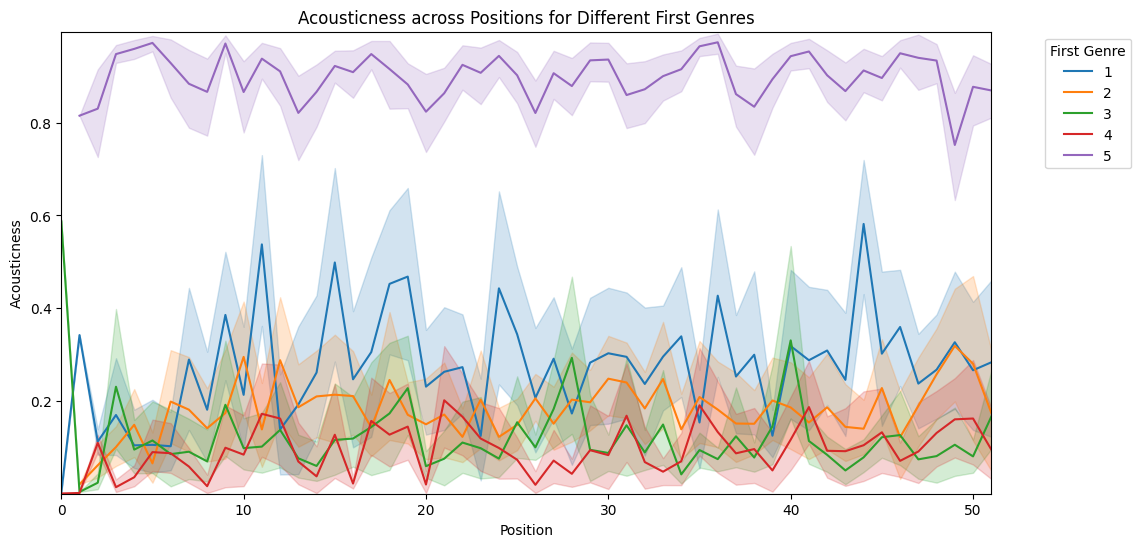

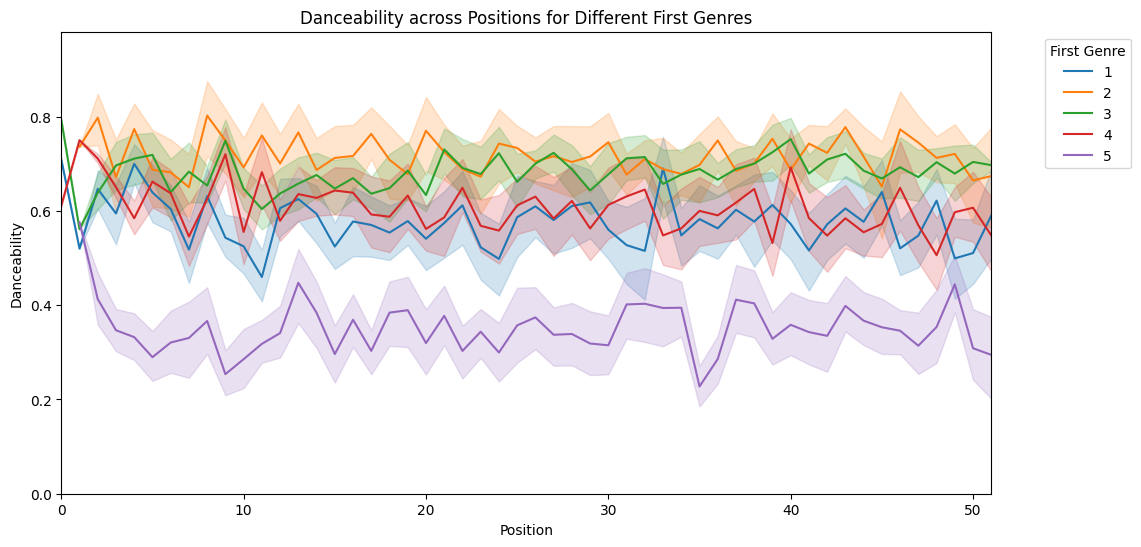

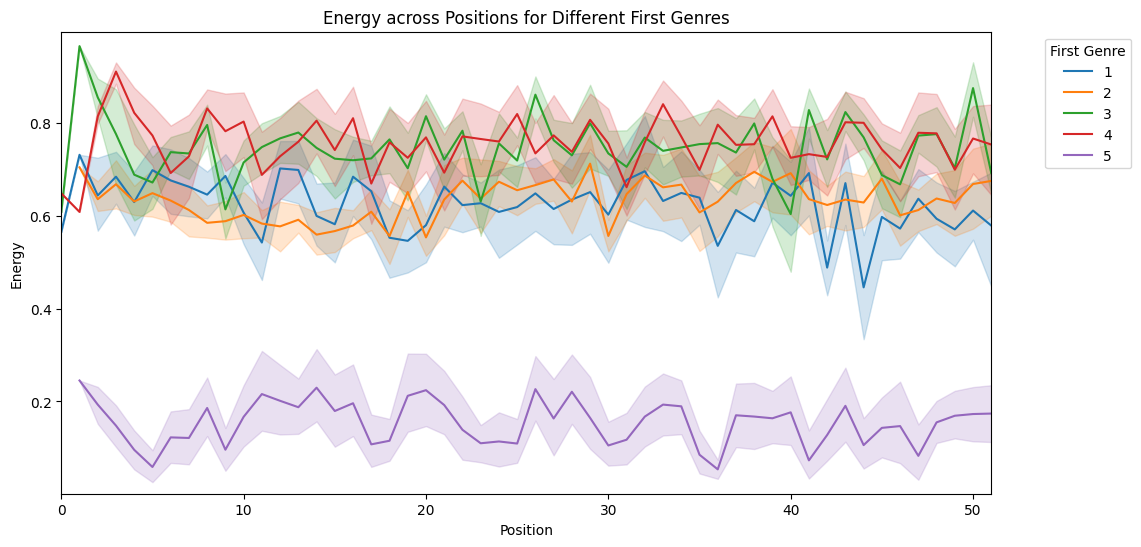

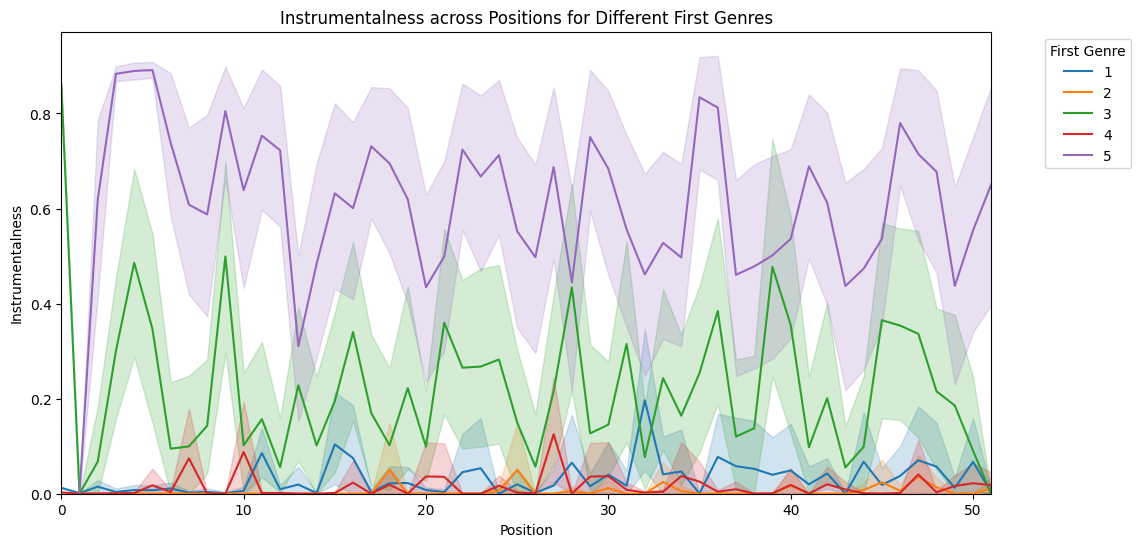

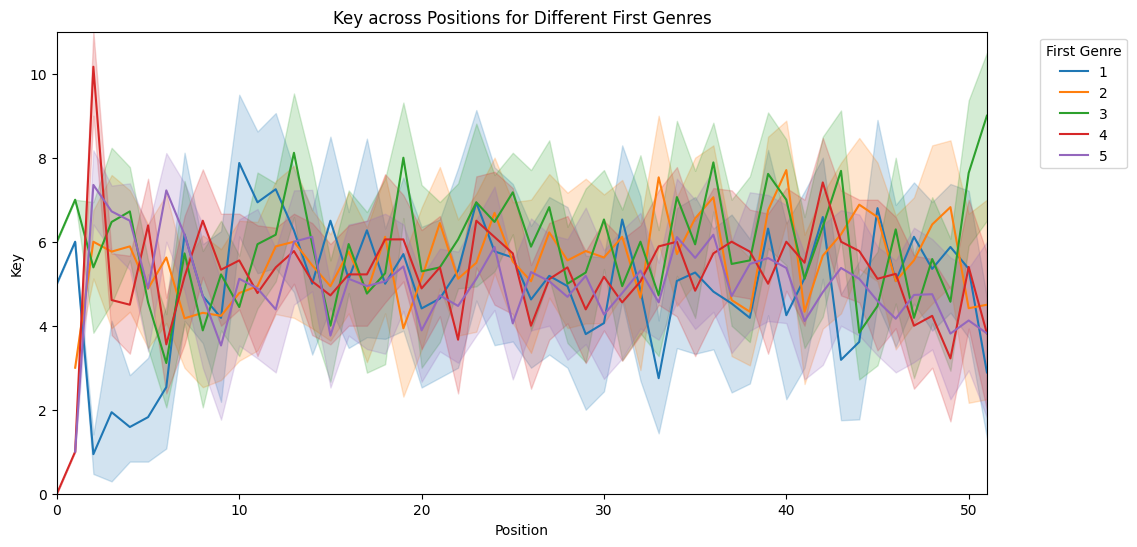

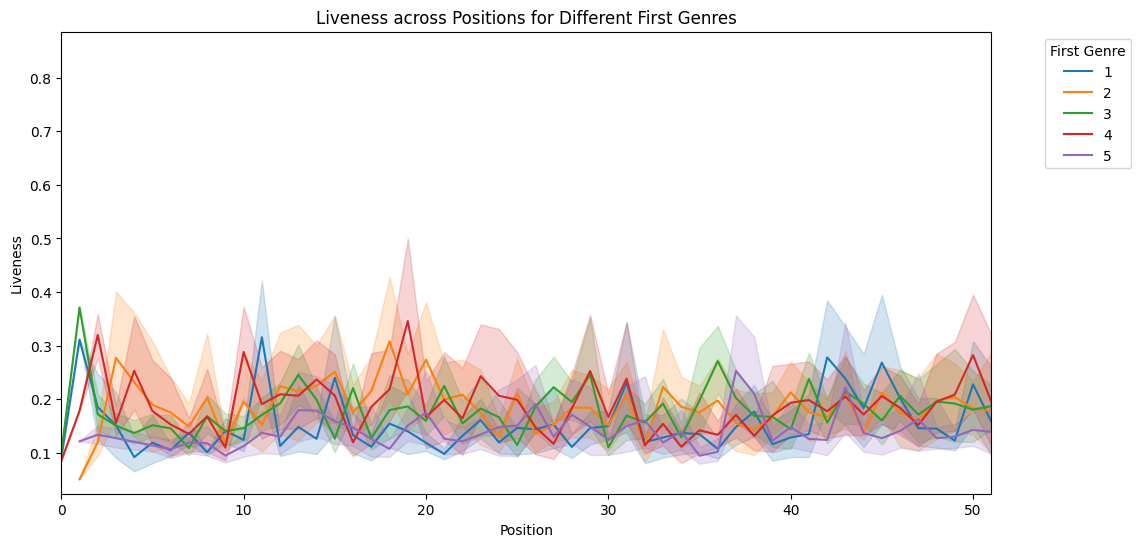

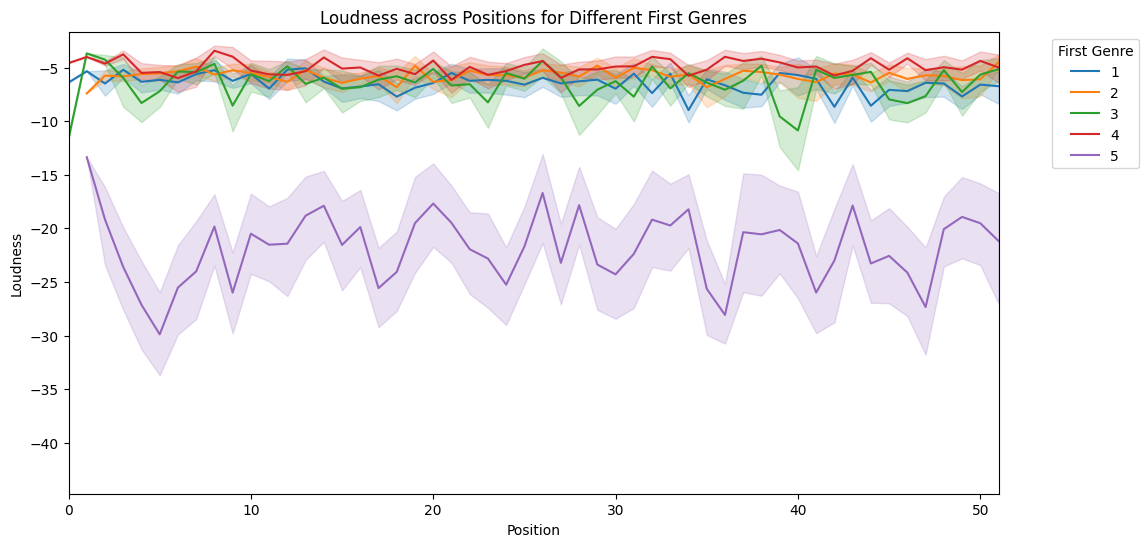

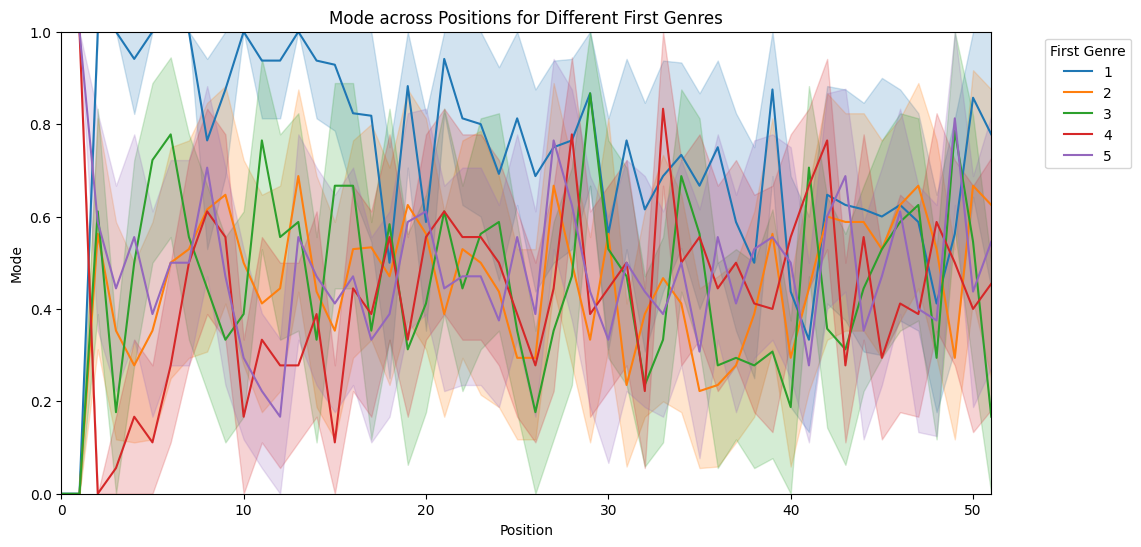

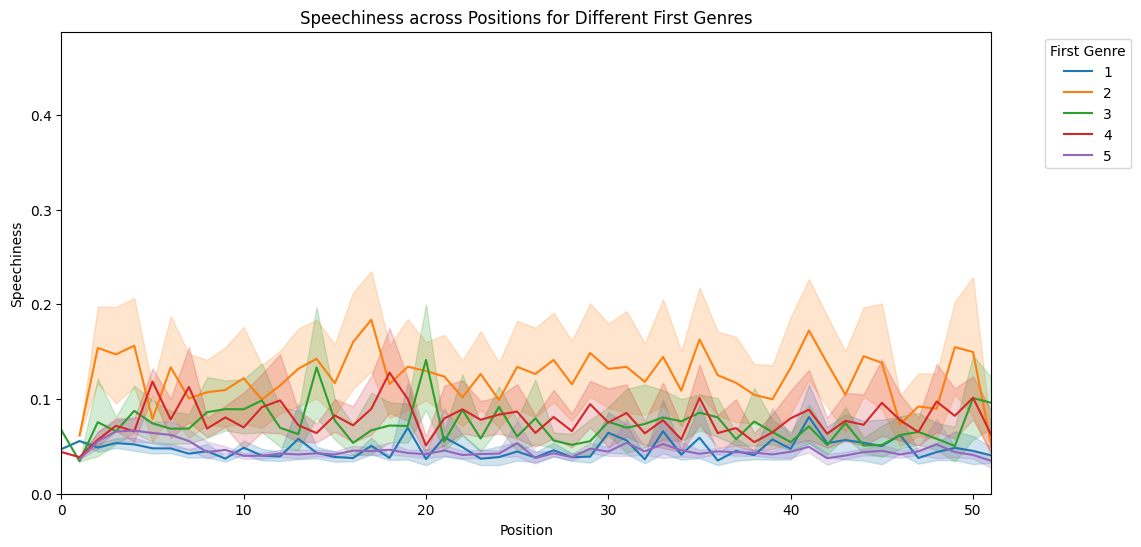

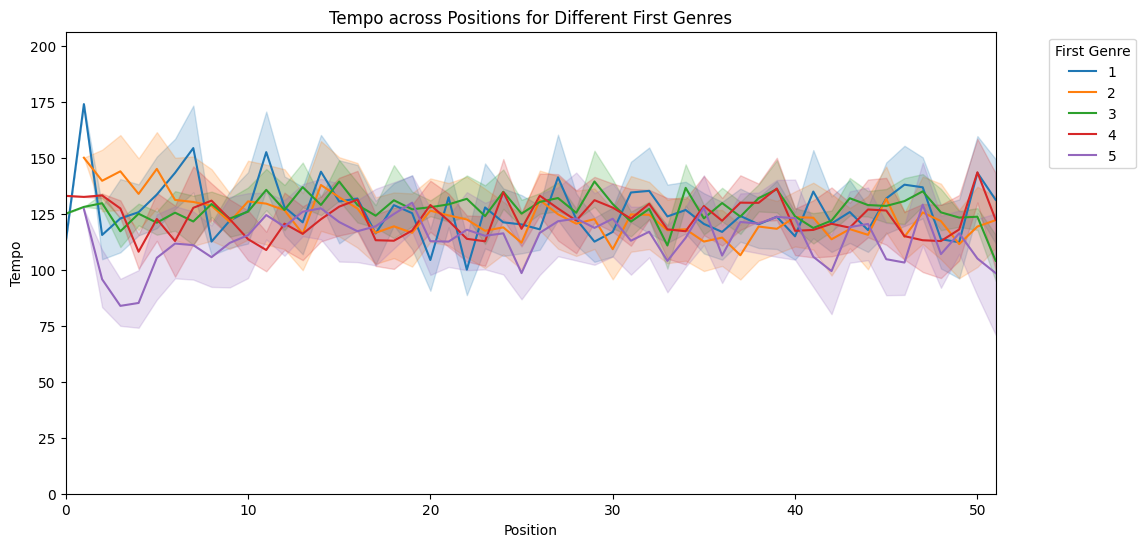

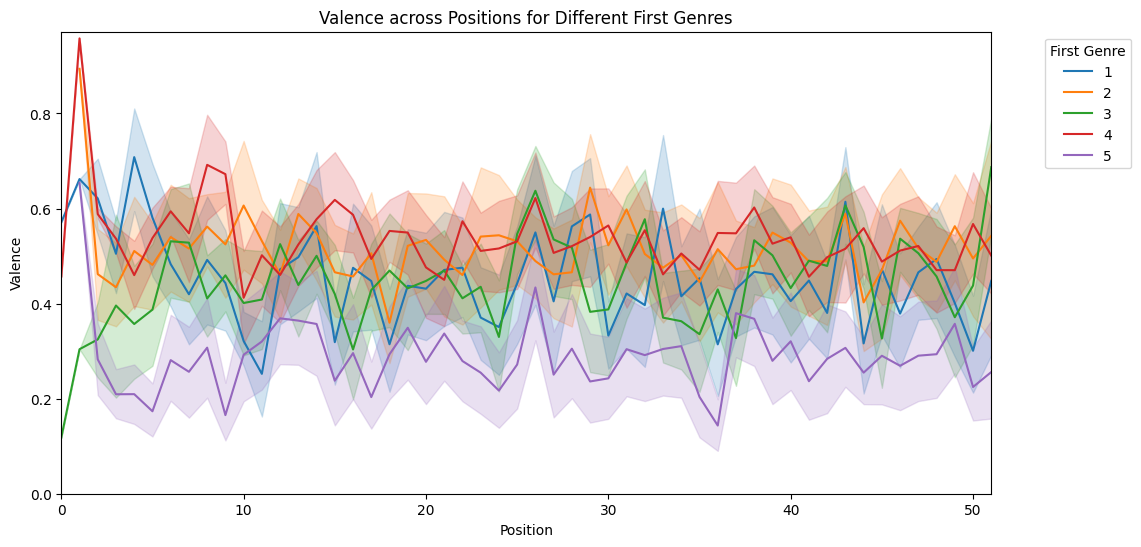

In [37]:

for feature in audio_features:
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='position', y=feature, hue='first_genre', data=dataset_1, palette='tab10')
    plt.xlim(0, 51)
    plt.ylim(dataset_1[feature].min(), dataset_1[feature].max())
    plt.title(f'{feature.capitalize()} across Positions for Different First Genres')
    plt.xlabel('Position')
    plt.ylabel(feature.capitalize())
    plt.legend(title='First Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# 2) Distance based, Audio features as a vector

In [122]:
# Feature separation
continuous_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 
                       'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
categorical_features = ['key', 'mode']
audio_features = continuous_features + categorical_features

# Clean data
dataset_1_clean = dataset_1[audio_features + ['position', 'first_genre', 'user']].dropna(subset=audio_features)
dataset_1_clean[audio_features] = dataset_1_clean[audio_features].astype(float)

In [126]:
from sklearn.discriminant_analysis import StandardScaler

scaler = StandardScaler()   
dataset_1_clean[continuous_features] = scaler.fit_transform(dataset_1_clean[continuous_features])

In [127]:
from sklearn.metrics.pairwise import cosine_similarity

def user_drift_analysis(session):
    """Per-user: distances from genre-specific dual seeds"""
    session = session.sort_values('position').reset_index(drop=True)
    if len(session) < 3:
        return pd.DataFrame()
    
    # FIXED: User's seed genre (same for all 48 songs)
    user_seed_genre = int(session.iloc[0]['first_genre'])  # Genre 1-5 for this user
    
    # Dual seeds: pos 0+1 (guaranteed same genre)
    seeds = session[session['position'] <= 1]
    seed_cont = np.mean(seeds[continuous_features].values, axis=0).reshape(1, -1)
    seed_cat  = np.mean(seeds[categorical_features].values, axis=0).reshape(1, -1)
    
    results = []
    # All 48 post-seed songs
    for _, song in session[session['position'] > 1].iterrows():
        song_cont = song[continuous_features].values.reshape(1, -1)
        song_cat  = song[categorical_features].values.reshape(1, -1)
        
        cont_drift = 1 - cosine_similarity(seed_cont, song_cont)[0, 0]
        cat_drift  = 1 - cosine_similarity(seed_cat, song_cat)[0, 0]
        total_drift = 1 - cosine_similarity(
            np.mean(seeds[audio_features].values, axis=0).reshape(1, -1),
            song[audio_features].values.reshape(1, -1)
        )[0, 0]
        
        results.append({
            'user': song['user'],
            'position': int(song['position']),  # 2-49
            'user_seed_genre': user_seed_genre,  # FIXED: User's genre (1-5)
            'cont_drift': float(cont_drift),
            'cat_drift': float(cat_drift),
            'total_drift': float(total_drift)
        })
    
    return pd.DataFrame(results)


In [ ]:
# Generate: 89 users × 48 songs
user_drifts = [user_drift_analysis(group) for _, group in dataset_1_clean.groupby('user')]



all_user_drifts = pd.concat([df for df in user_drifts if len(df) > 0], ignore_index=True)

print(f"Final Dataset: {len(all_user_drifts)} rows ({all_user_drifts['user'].nunique()} users)")
print("\nFirst 5 rows:")
print(all_user_drifts.head())
print("\nGenres per user (should be 1 each):")
print(all_user_drifts.groupby('user')['user_seed_genre'].nunique().value_counts())
print("\nShape:", all_user_drifts.shape)

Final Dataset: 4157 rows (89 users)

First 5 rows:
                                             user  position  user_seed_genre  \
0  0eeb2810a28f4aec9fb457dd2049c015_Benedict Bond         2                3   
1  0eeb2810a28f4aec9fb457dd2049c015_Benedict Bond         3                3   
2  0eeb2810a28f4aec9fb457dd2049c015_Benedict Bond         4                3   
3  0eeb2810a28f4aec9fb457dd2049c015_Benedict Bond         5                3   
4  0eeb2810a28f4aec9fb457dd2049c015_Benedict Bond         6                3   

   cont_drift  cat_drift  total_drift  
0    0.824714   0.000000     0.448779  
1    0.149522   0.000000     0.009167  
2    0.321476   0.010051     0.055497  
3    1.192065   0.105573     0.320938  
4    1.389224   0.000000     0.766568  

Genres per user (should be 1 each):
user_seed_genre
1    89
Name: count, dtype: int64

Shape: (4157, 6)


In [140]:
all_user_drifts.to_csv('89_user_48_song_drifts.csv', index=False)
print("💾 Saved: 89_user_48_song_drifts.csv")
print("\nColumns:", all_user_drifts.columns.tolist())
print("\nQuick stats by user_seed_genre:")
print(all_user_drifts.groupby('user_seed_genre')['total_drift'].agg(['mean', 'std', 'count']).round(3))


💾 Saved: 89_user_48_song_drifts.csv

Columns: ['user', 'position', 'user_seed_genre', 'cont_drift', 'cat_drift', 'total_drift']

Quick stats by user_seed_genre:
                  mean    std  count
user_seed_genre                     
1                0.318  0.320    776
2                0.339  0.208    826
3                0.226  0.283    827
4                0.632  0.160    882
5                0.479  0.099    846


,user,position,user_seed_genre,cont_drift,cat_drift,total_drift
0,0eeb2810a28f4aec9fb457dd2049c015_Benedict Bond,2,3,0.824714,0.000000,0.448779
1,0eeb2810a28f4aec9fb457dd2049c015_Benedict Bond,3,3,0.149522,0.000000,0.009167
2,0eeb2810a28f4aec9fb457dd2049c015_Benedict Bond,4,3,0.321476,0.010051,0.055497
3,0eeb2810a28f4aec9fb457dd2049c015_Benedict Bond,5,3,1.192065,0.105573,0.320938
4,0eeb2810a28f4aec9fb457dd2049c015_Benedict Bond,6,3,1.389224,0.000000,0.766568


📊 Stats preview:
   position  user_seed_genre      mean       std  count
0         2                1  0.622020  0.327464     17
1         2                2  0.222829  0.110716     16
2         2                3  0.218098  0.260119     18
3         2                4  0.663886  0.049803     18
4         2                5  0.501741  0.050315     17
Genres: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)]
Positions: 2 → 51


C:\Users\rahul\AppData\Local\Temp\ipykernel_39640\830230803.py:37: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\rahul\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


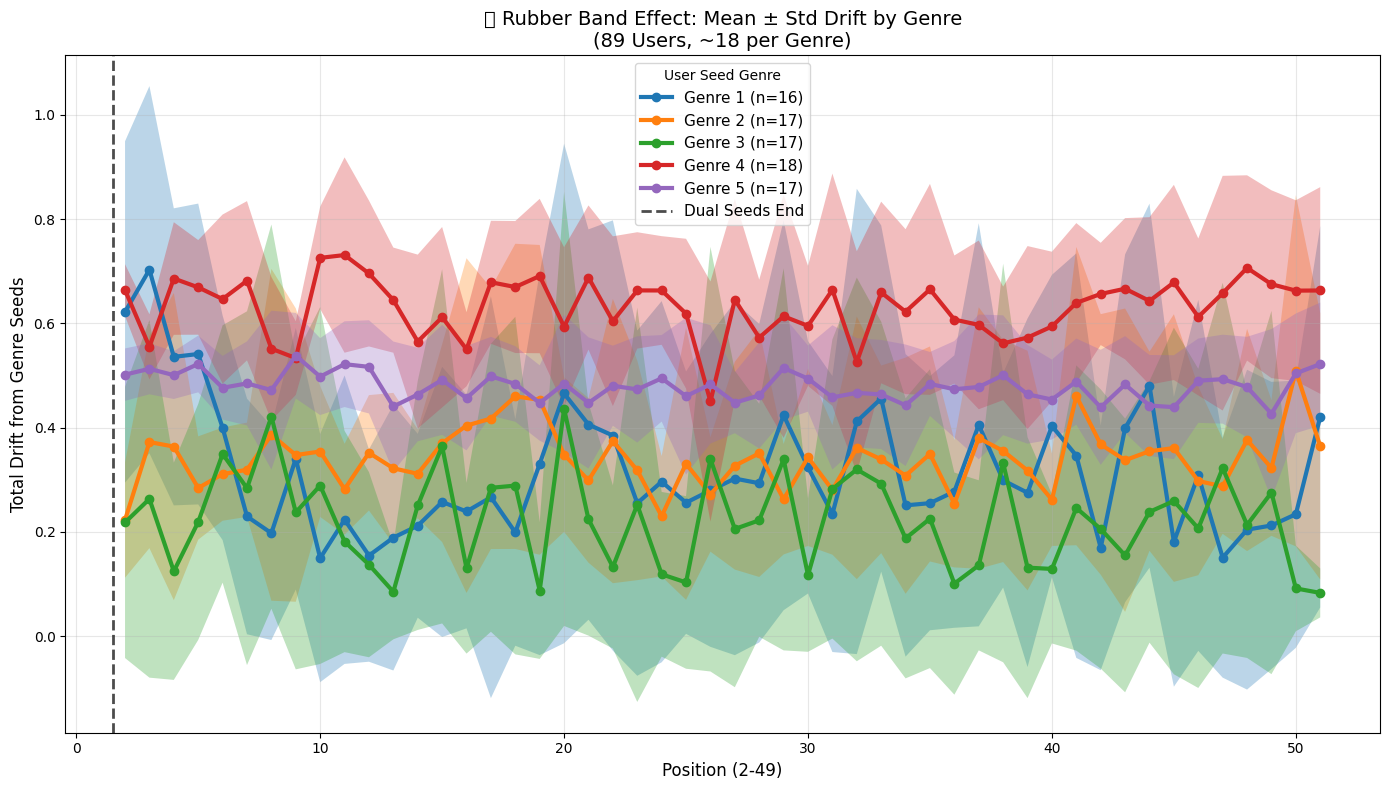

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load your saved data
all_user_drifts = pd.read_csv('89_user_48_song_drifts.csv')

# Calculate mean + std by position and genre (~18 users per genre)
drift_stats = all_user_drifts.groupby(['position', 'user_seed_genre'])['total_drift'].agg(['mean', 'std', 'count']).reset_index()

print("📊 Stats preview:")
print(drift_stats.head())
print(f"Genres: {sorted(all_user_drifts['user_seed_genre'].unique())}")
print(f"Positions: {all_user_drifts['position'].min()} → {all_user_drifts['position'].max()}")

# Plot: Mean ± 1 std, ~18 users per genre per position
plt.figure(figsize=(14, 8))
for genre in sorted(all_user_drifts['user_seed_genre'].unique()):
    genre_data = drift_stats[drift_stats['user_seed_genre'] == genre]
    
    plt.plot(genre_data['position'], genre_data['mean'], 
             marker='o', linewidth=3, label=f'Genre {int(genre)} (n={genre_data["count"].mean():.0f})')
    
    # Shaded std region
    plt.fill_between(genre_data['position'], 
                     genre_data['mean'] - genre_data['std'], 
                     genre_data['mean'] + genre_data['std'], 
                     alpha=0.3)

plt.axvline(x=1.5, color='k', ls='--', lw=2, alpha=0.7, label='Dual Seeds End')
plt.xlabel('Position (2-49)', fontsize=12)
plt.ylabel('Total Drift from Genre Seeds', fontsize=12)
plt.title('🎯 Rubber Band Effect: Mean ± Std Drift by Genre\n(89 Users, ~18 per Genre)', fontsize=14)
plt.legend(title='User Seed Genre', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


<Figure size 1500x1000 with 0 Axes>

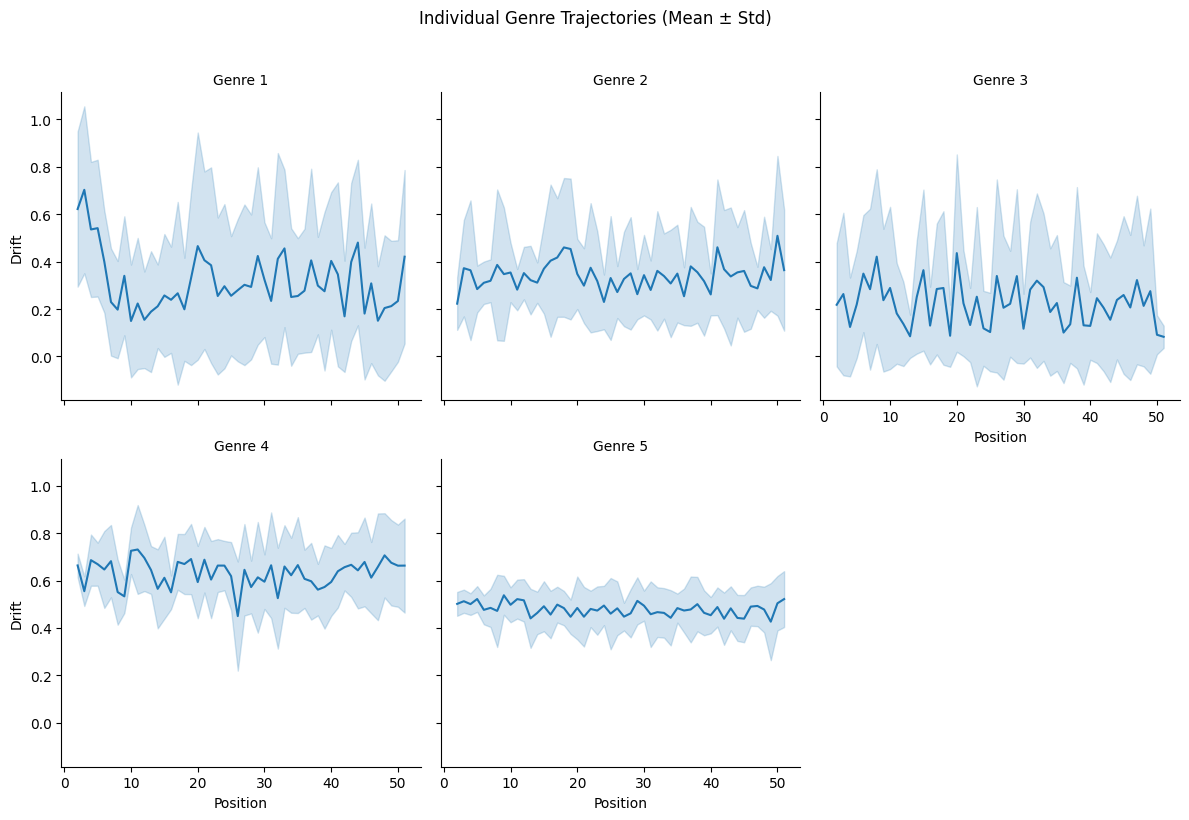

In [142]:
# Bonus: Separate panels per genre
plt.figure(figsize=(15, 10))
g = sns.FacetGrid(all_user_drifts, col='user_seed_genre', col_wrap=3, height=4)
g.map(sns.lineplot, 'position', 'total_drift', errorbar='sd')
g.set_titles('Genre {col_name}')
g.set_xlabels('Position')
g.set_ylabels('Drift')
g.fig.suptitle('Individual Genre Trajectories (Mean ± Std)', y=1.02)
plt.tight_layout()
plt.show()
